In [44]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

from scipy import stats
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
from numpy import random

from sklearn.cluster import DBSCAN

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

In [45]:
# Load the Spotify dataset
# Ensure the .csv file is in the correct directory or provide a full path to the file
tracks_df = pd.read_csv("D:/Anaconda/Spotify_tracks.csv")

In [46]:
tracks_df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [47]:
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [48]:
tracks_df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [49]:
# Select only necessary features for clustering
tracks = tracks_df[["acousticness","danceability","energy","instrumentalness","liveness","speechiness","valence"]]

In [50]:
tracks.describe()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
count,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,0.314910,0.566800,0.641383,0.156050,0.213553,0.084652,0.474068
std,0.332523,0.173542,0.251529,0.309555,0.190378,0.105732,0.259261
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.016900,0.456000,0.472000,0.000000,0.098000,0.035900,0.260000
50%,0.169000,0.580000,0.685000,0.000042,0.132000,0.048900,0.464000
75%,0.598000,0.695000,0.854000,0.049000,0.273000,0.084500,0.683000
max,0.996000,0.985000,1.000000,1.000000,1.000000,0.965000,0.995000


In [51]:
tracks[(np.abs(stats.zscore(tracks)) < 3).all(axis=1)]

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
0,0.0322,0.676,0.4610,0.000001,0.3580,0.1430,0.7150
1,0.9240,0.420,0.1660,0.000006,0.1010,0.0763,0.2670
2,0.2100,0.438,0.3590,0.000000,0.1170,0.0557,0.1200
3,0.9050,0.266,0.0596,0.000071,0.1320,0.0363,0.1430
4,0.4690,0.618,0.4430,0.000000,0.0829,0.0526,0.1670
...,...,...,...,...,...,...,...
113995,0.6400,0.172,0.2350,0.928000,0.0863,0.0422,0.0339
113996,0.9940,0.174,0.1170,0.976000,0.1050,0.0401,0.0350
113997,0.8670,0.629,0.3290,0.000000,0.0839,0.0420,0.7430
113998,0.3810,0.587,0.5060,0.000000,0.2700,0.0297,0.4130


In [80]:
# Initialize the KMeans model with 5 clusters
# We can adjust the number of clusters based on our understanding of the data
kmeans = KMeans(n_clusters=9)

In [81]:
kmeans

KMeans(n_clusters=9)

In [82]:
# Train the model with our data
kmeans.fit(tracks)

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=9)

In [83]:
# Add a new column 'type' to the dataframe. This column will contain the cluster number each track belongs to.
tracks["type"] = kmeans.labels_

C:\Users\nirmi\AppData\Local\Temp\ipykernel_16540\1953692782.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tracks["type"] = kmeans.labels_


In [84]:
#predict the labels of clusters.
label_KMeans = kmeans.fit_predict(tracks)
 
print(label_KMeans)

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[3 5 0 ... 1 1 1]


<Axes: xlabel='acousticness', ylabel='speechiness'>

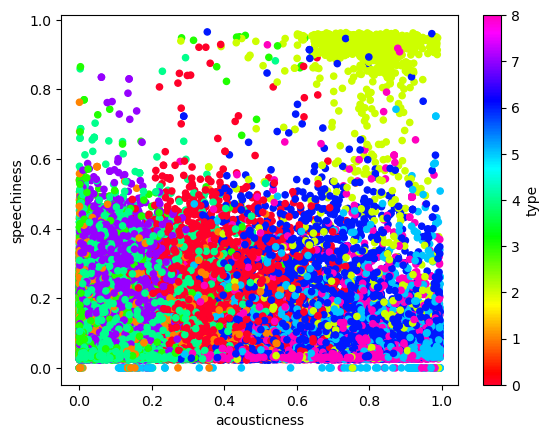

In [85]:
tracks.plot.scatter('acousticness', 'speechiness', c='type', colormap='gist_rainbow')


<Axes: xlabel='energy', ylabel='liveness'>

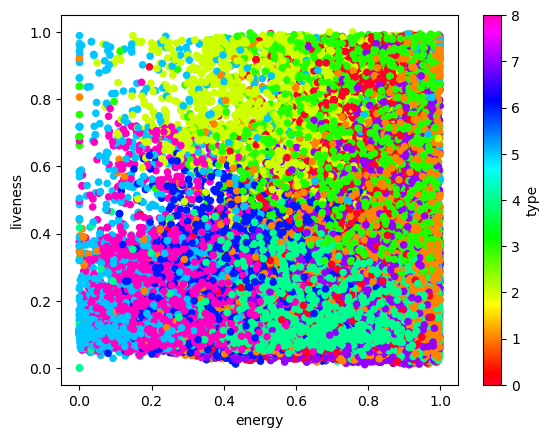

In [86]:
tracks.plot.scatter('energy', 'liveness',c='type', colormap='gist_rainbow')

In [87]:
##Applying DBSCAN on the scaled data (df)
dbscan = DBSCAN(eps=0.2, min_samples=2)
dbscan.fit(tracks)

DBSCAN(eps=0.2, min_samples=2)

In [88]:
dbscan.labels_

array([0, 1, 2, ..., 4, 4, 4], dtype=int64)

In [89]:
import seaborn as sns

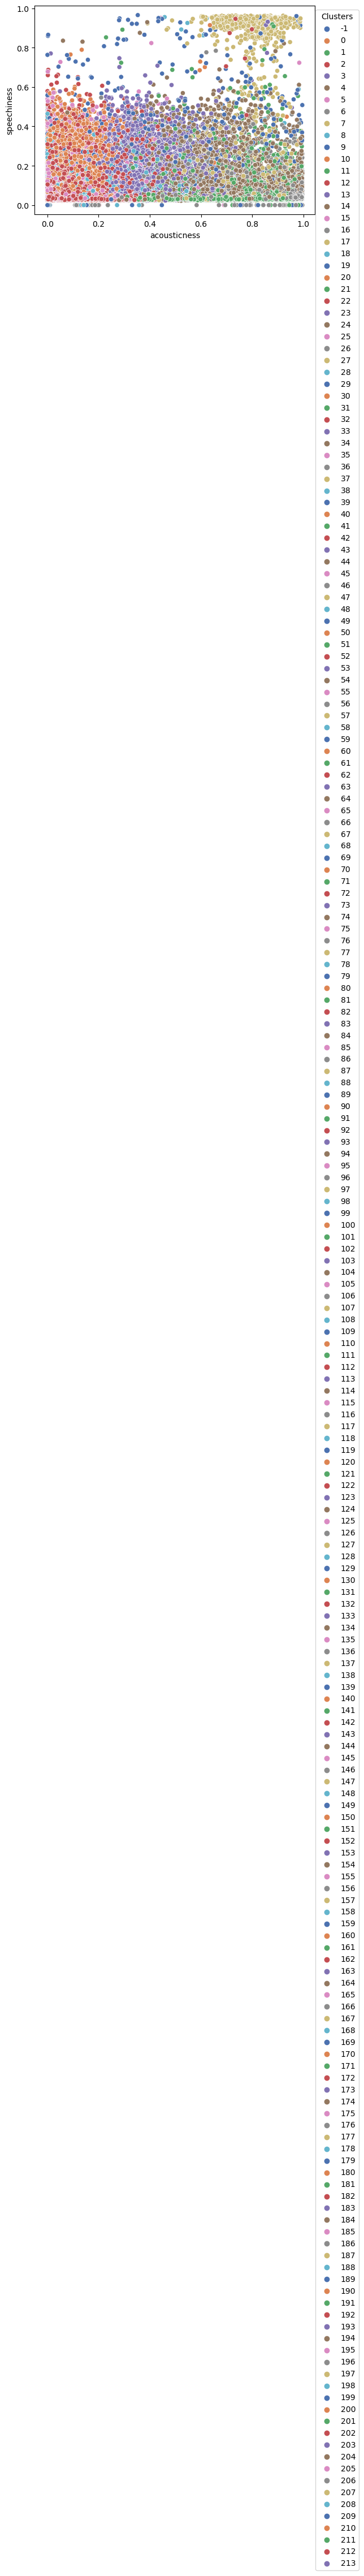

In [90]:
p = sns.scatterplot(data=tracks, x='acousticness', y='speechiness', hue=dbscan.labels_,
legend="full", palette='deep')
sns.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
plt.show()

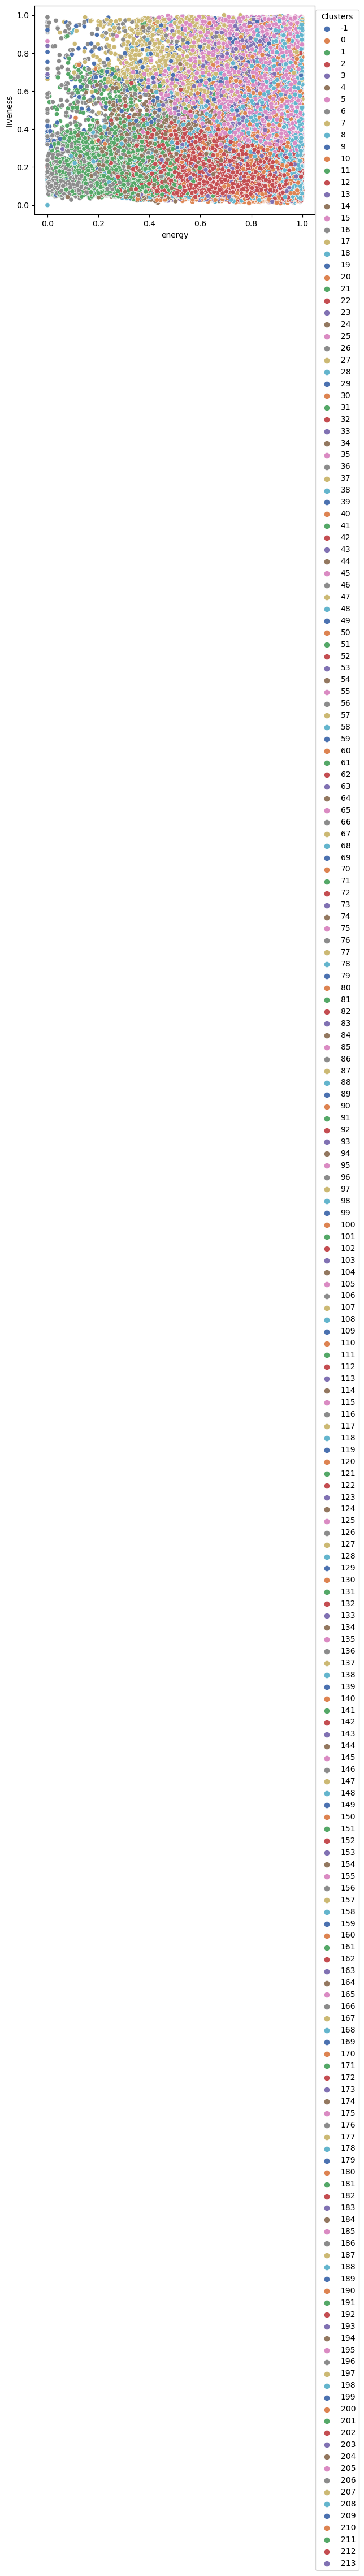

In [91]:
p = sns.scatterplot(data=tracks, x='energy', y='liveness', hue=dbscan.labels_, legend="full", palette='deep')
sns.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
plt.show()

In [92]:
tracks_small = tracks.drop(tracks.index[2000:])

In [100]:
#sc = SpectralClustering(n_clusters=4).fit(tracks_small)
#print(sc)
sc=SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
                   eigen_solver=None, eigen_tol=0.0, gamma=1.0,
                   kernel_params=None, n_clusters=4, n_components=None,
                   n_init=10, n_jobs=None, n_neighbors=10, random_state=None).fit(tracks_small)

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


In [101]:
sc.labels_

array([1, 3, 2, ..., 1, 0, 1])

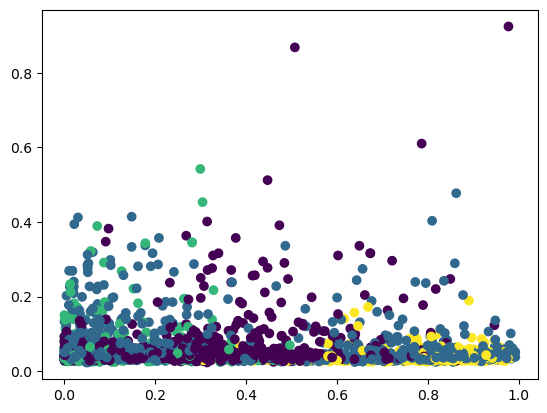

In [105]:
plt.scatter(tracks_small['acousticness'], tracks_small['speechiness'], c=sc.labels_)

In [12]:
# Save the dataframe with cluster information as a new CSV file
tracks_df.to_csv("result.csv", index=False)

# Load the updated data with cluster info
tracks = pd.read_csv("result.csv")

In [13]:
# Prompt the user to enter their favorite songs' ids
ids = input('Enter comma-separated ids of your favorite songs\n> ').strip().split(',')

# Filter the dataframe to get the user's favorite songs
favorites = tracks[tracks['track_id'].isin(ids)]

Enter comma-separated ids of your favorite songs
> 5vjLSffimiIP26QG5WcN2K


In [14]:
# Find out the most frequent cluster among the user's favorite songs
clusters = favorites['type'].value_counts()
user_favorite_cluster = clusters.idxmax()

print('\nFavorite cluster:', user_favorite_cluster, '\n')


Favorite cluster: 0 



In [15]:
# Get the songs that belong to the user's favorite cluster
suggestions = tracks[tracks['type'] == user_favorite_cluster]

# Print the first 5 song suggestions
print(suggestions.head())

   Unnamed: 0                track_id                               artists  \
1           1  4qPNDBW1i3p13qLCt0Ki3A                          Ben Woodward   
3           3  6lfxq3CG4xtTiEg7opyCyx                          Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K                      Chord Overstreet   
6           6  6Vc5wAMmXdKIAM7WUoEb7N  A Great Big World;Christina Aguilera   
7           7  1EzrEOXmMH3G43AXT1y7pA                            Jason Mraz   

                                          album_name  \
1                                   Ghost (Acoustic)   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   
6                        Is There Anybody Out There?   
7                We Sing. We Dance. We Steal Things.   

                   track_name  popularity  duration_ms  explicit  \
1            Ghost - Acoustic          55       149610     False   
3  Can't Help Falling In Love          71       2019